# Initialization

In [1]:
from google.colab import drive
import os

# Select your root directory on your google drive
drive.mount('/gdrive')
os.chdir("/gdrive/Shared drives/TF Eng Civil PTR - Guilherme_Felipe - 2022/4. CÓDIGOS/OpenStreetMapsPython/")

os.listdir()

Mounted at /gdrive


['OSM_Ambev.ipynb',
 'cache',
 'data',
 'images',
 'osmnx_ambev.drawio',
 'output.html',
 'arquivo_export.csv',
 'arquivo_export_guarulhos_osmnx.gsheet',
 'OSM_Ambev _limpov2.ipynb']

In [2]:
%pip install osmnx matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 13.1 MB 28.7 MB/s 
     |████████████████████████████████| 1.0 MB 49.3 MB/s 
     |████████████████████████████████| 1.0 MB 31.3 MB/s 
     |████████████████████████████████| 6.3 MB 44.6 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 93 kB 2.8 MB/s 
     |████████████████████████████████| 91 kB 12.6 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
     |████████████████████████████████| 87 kB 7.7 MB/s 
     |████████████████████████████████| 87 kB 6.7 MB/s 
     |████████████████████████████████| 87 kB 8.0 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 84 kB 3.3 M

In [3]:
import numpy as np
import osmnx as ox
import networkx as nx
import pandas as pd
import geopandas as gpd
import shapely
import shapely.ops as ops
import pyproj

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

from math import radians, cos, sin, asin, sqrt
from descartes import PolygonPatch
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
# from shapely.geometry.polygon import Polygon

%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11.4'

# Define custom functions

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

# Start using osmnx

In [ ]:
# help(ox.graph_from_place)

In [ ]:
G = ox.graph_from_point((-23.435326,-46.386492), 
                        dist=1000, 
                        dist_type='bbox', 
                        network_type='drive', 
                        simplify=True, 
                        retain_all=False, 
                        truncate_by_edge=False, 
                        clean_periphery=True, 
                        custom_filter=None)

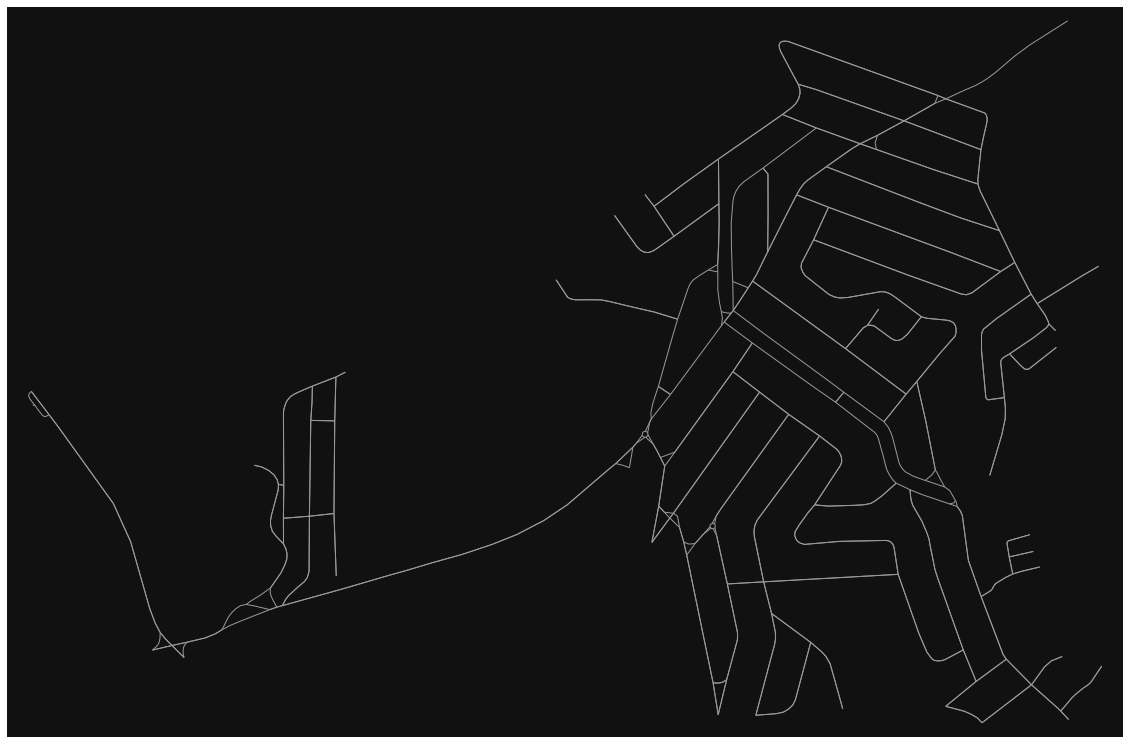

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f174de9a2d0>)

In [ ]:
ox.plot_graph(G, 
              ax=None, 
              figsize=(20, 20), 
              bgcolor='#111111', 
              node_color='w', 
              node_size=0, 
              node_alpha=None, 
              node_edgecolor='none', 
              node_zorder=1, 
              edge_color='#999999', 
              edge_linewidth=1, 
              edge_alpha=None, 
              show=True, 
              close=False, 
              save=False, 
              filepath=None, 
              dpi=600, 
              bbox=None)

In [ ]:
#convert nodes information to a data frame
df_nodes = ox.graph_to_gdfs(G, edges=False)
df_nodes

In [ ]:
#convert edges information to a data frame
df_edges = ox.graph_to_gdfs(G, nodes=False)
df_edges

In [ ]:
# for i in ox.extended_stats(G):
#     print(i)

### Create a graph from a bounding box

In [ ]:
# north (float) – northern latitude of bounding box
# south (float) – southern latitude of bounding box
# east (float) – eastern longitude of bounding box
# west (float) – western longitude of bounding box

guarulhos = ox.graph.graph_from_bbox(north= -23.61005592, 
                                     south= -23.21768188, 
                                     east=  -46.42976761, 
                                     west=  -46.57093033, 
                                     network_type='drive', 
                                     simplify=False, 
                                     retain_all=True, 
                                     truncate_by_edge=False, 
                                     clean_periphery=True, 
                                     custom_filter=None)

In [ ]:
# save our graph in shapefile

ox.save_graph_shapefile(guarulhos,
                        filepath=None,
                        encoding='utf-8',
                        directed=False)

In [ ]:
# simply plot our graph

ox.plot_graph(guarulhos, 
              ax=None, 
              figsize=(20, 20), 
              bgcolor='#111111', 
              node_color='w', 
              node_size=0, 
              node_alpha=None, 
              node_edgecolor='none', 
              node_zorder=1, 
              edge_color='#999999', 
              edge_linewidth=1, 
              edge_alpha=None, 
              show=True, 
              close=False, 
              save=False, 
              filepath=None, 
              dpi=600, 
              bbox=None)

In [ ]:
ox.stats.basic_stats(guarulhos, 
                     area=None, 
                     clean_int_tol=None, 
                     clean_intersects=None, 
                     tolerance=None, 
                     circuity_dist=None)

### Importing multiple cities as a single query

In [ ]:
# in case you need multiple places in a single file:
# you can get multiple places in a single query
# gdf = ox.geocode_to_gdf(["Guarulhos, São Paulo, Brasil", 
#                          "Arujá, São Paulo, Brasil", 
#                          "Itaquaquecetuba, São Paulo, Brasil"])



In [ ]:
# ox.plot_graph(gdf, 
#               ax=None, 
#               figsize=(20, 20), 
#               bgcolor='#111111', 
#               node_color='w', 
#               node_size=0, 
#               node_alpha=None, 
#               node_edgecolor='none', 
#               node_zorder=1, 
#               edge_color='#999999', 
#               edge_linewidth=1, 
#               edge_alpha=None, 
#               show=True, 
#               close=False, 
#               save=False, 
#               filepath=None, 
#               dpi=600, 
#               bbox=None)

### Evaluate Circuity Factors

distance= 1018.98


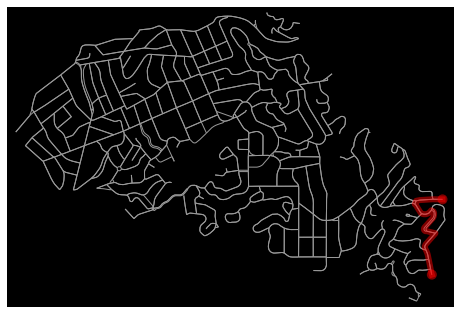

In [ ]:
origin = [-23.435326, -46.386492]  #CDD  
destination = [-23.4464717210345, -46.5166478903448]  #PDV 91600004

#get the nearest node of the network
origin_node = ox.distance.nearest_nodes(G, 
                                        origin[1], 
                                        origin[0]) #Graph, LONGITUDE, LATITUDE

destination_node = ox.distance.nearest_nodes(G, 
                                             destination[1], 
                                             destination[0])   

#shortest path
route = nx.shortest_path(G, 
                         source=origin_node, 
                         target=destination_node, 
                         weight='length')

#Compute travel distance in the network 
dist = sum(ox.utils_graph.get_route_edge_attributes(G, 
                                                    route, 
                                                    attribute='length', 
                                                    minimize_key='length'))
print('distance= ' + str(dist) + " m")

fig, ax = ox.plot_graph_route(G, 
                              route, 
                              route_linewidth=6, 
                              node_size=0, 
                              bgcolor='k')

In [ ]:
# Better describe route lenght calculation
ox.utils_graph.get_route_edge_attributes(G, route, minimize_key='length')

[{'geometry': <shapely.geometry.linestring.LineString at 0x7f8d2c181790>,
  'highway': 'unclassified',
  'length': 1010.5820000000001,
  'oneway': False,
  'osmid': 836955584},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f8d2afe62d0>,
  'highway': 'unclassified',
  'length': 5641.424000000002,
  'oneway': False,
  'osmid': 191380967},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f8d44304490>,
  'highway': 'unclassified',
  'length': 572.685,
  'oneway': False,
  'osmid': 191380967},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f8d3d0ff750>,
  'highway': 'unclassified',
  'length': 22.273000000000003,
  'oneway': False,
  'osmid': 191380967},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f8d2afb9410>,
  'highway': 'unclassified',
  'length': 30.918,
  'oneway': False,
  'osmid': 191380971},
 {'geometry': <shapely.geometry.linestring.LineString at 0x7f8d2afb9990>,
  'highway': 'tertiary',
  'length': 154.16699999999997,
  'maxsp

# Street network centrality analysis

Author: Geoff Boeing

We can calculate and visualize how "important" a node or an edge is in a street network by measuring its centrality.

In some traditions of street network analysis, streets are represented as nodes and intersections are represented as edges. This is called a line graph, or sometimes a dual graph, and it essentially inverts the topology of the street network seen above. We can do this with OSMnx too.

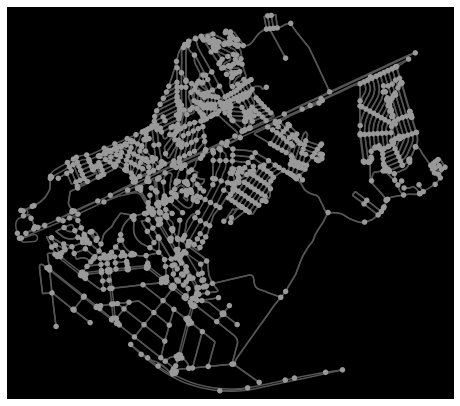

In [ ]:
# download and project a street network
G_cumbica = ox.graph_from_place('Cumbica, Guarulhos, São Paulo, Brasil', network_type='drive')
G_cumbica = ox.project_graph(G_cumbica)

fig, ax = ox.plot_graph(G_cumbica, bgcolor='k', 
                        node_size=30, 
                        node_color='#999999', 
                        node_edgecolor='none', 
                        node_zorder=2,
                        edge_color='#555555', 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

In [ ]:
ox.stats.basic_stats(G_cumbica,
                     area=None,
                     clean_int_tol=None,
                     clean_intersects=None,
                     tolerance=None,
                     circuity_dist=None)

{'circuity_avg': 1.0395784637019592,
 'edge_length_avg': 116.27097544204311,
 'edge_length_total': 355091.55899999966,
 'intersection_count': 1183,
 'k_avg': 4.906024096385543,
 'm': 3054,
 'n': 1245,
 'self_loop_proportion': 0.0005285412262156448,
 'street_length_avg': 114.78098995771684,
 'street_length_total': 217165.63300000026,
 'street_segment_count': 1892,
 'streets_per_node_avg': 3.066666666666667,
 'streets_per_node_counts': {0: 0, 1: 62, 2: 2, 3: 972, 4: 209},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.04979919678714859,
  2: 0.001606425702811245,
  3: 0.7807228915662651,
  4: 0.1678714859437751}}

In [ ]:
ox.stats.intersection_count(G_cumbica)

1183

## Calculate and visualize node centrality

In [ ]:
# https://stackoverflow.com/questions/61880977/how-to-create-a-color-bar-in-an-osmnx-plot

In [ ]:
node_centrality = nx.closeness_centrality(cumbica_test)
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='viridis', start=0, stop=0.8)  # Missing .plot. on github demo
df = df.reindex(cumbica_test.nodes())
nc = df['colors'].tolist()

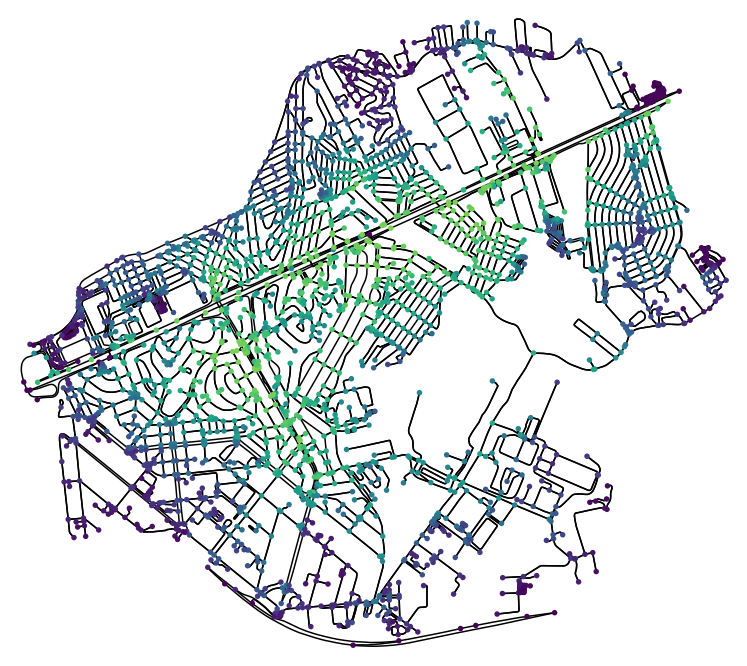

In [ ]:
fig, ax = ox.plot_graph(cumbica_test, bgcolor='white', 
                        node_size=30, 
                        node_color=nc, 
                        node_edgecolor='none', 
                        node_zorder=2,
                        edge_color="black",#'#555555', 
                        edge_linewidth=1.5, 
                        edge_alpha=1,
                        fig_height=12)

In [ ]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G_cumbica)

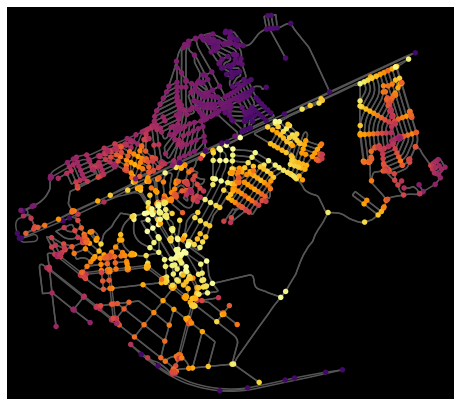

In [ ]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)  # Missing .plot. on github demo
df = df.reindex(G.nodes())
nc = df['colors'].tolist()

fig, ax = ox.plot_graph(G_cumbica, bgcolor='k', 
                        node_size=30, 
                        node_color=nc, 
                        node_edgecolor='none', 
                        node_zorder=2,
                        edge_color='#555555', 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

## Calculate and visualize edge centrality

In [ ]:
# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G_cumbica))

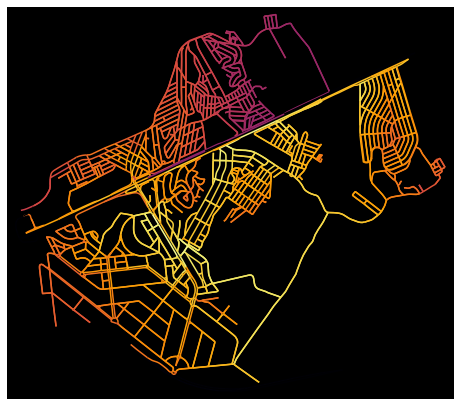

In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G_cumbica.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G_cumbica, 
                        bgcolor='k', 
                        #axis_off=True, # deprecated
                        node_size=0, 
                        node_color='w', 
                        node_edgecolor='gray', 
                        node_zorder=2,
                        edge_color=ec, 
                        edge_linewidth=1.5, 
                        edge_alpha=1)

In [ ]:
# save a shapefile with centrality as node and edge attributes
nx.set_node_attributes(G, node_centrality, 'node_centrality')
nx.set_edge_attributes(G, edge_centrality, 'edge_centrality')
ox.save_graph_shapefile(G)

/usr/local/lib/python3.7/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/usr/local/lib/python3.7/dist-packages/osmnx/io.py:109: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


# Plot street network over place shape

In [ ]:
# get the place boundaries
place = "Cumbica, Guarulhos, São Paulo, Brasil"
gdf = ox.geocode_to_gdf(place)

# get the street network, with retain_all=True to retain all the disconnected islands' networks
G = ox.graph_from_place(place, network_type="drive", retain_all=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/usr/local/lib/python3.7/dist-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


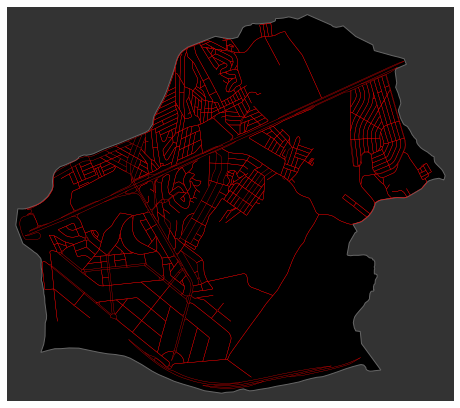

In [ ]:
# plot the network, but do not show it or close it yet
fig, ax = ox.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor="#333333",
    edge_color="w",
    edge_linewidth=0.3,
    node_size=0,
)

# to this matplotlib axis, add the place shape as descartes polygon patches
for geometry in gdf["geometry"].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, 
                                 fc="k", 
                                 ec="#666666", 
                                 lw=1, 
                                 alpha=1, 
                                 zorder=-1)
            ax.add_patch(patch)

# optionally set up the axes extents
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
plt.show()

In [ ]:
islands = ox.geometries_from_place(place, tags={"place": ["island", "islet"]})
islands.shape

(0, 1)

# Integrate osmnx with Folium

In [ ]:
# download the street network for Piedmont, CA
# G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
G = ox.graph_from_place("Guarulhos, São Paulo, Brasil", network_type="drive")

In [ ]:
# plot the street network with folium
m1 = ox.plot_graph_folium(G, popup_attribute="name", weight=2, color="#8b0000")

In [ ]:
# save as html file then display map as an iframe
filepath = "data/graph.html"
m1.save(filepath)
IFrame(filepath, width=600, height=500)

In [ ]:
# use networkx to calculate the shortest path between two nodes
origin_node = list(G.nodes())[0]
destination_node = list(G.nodes())[-1]
route = nx.shortest_path(G, origin_node, destination_node)

In [ ]:
# plot the route with folium
# like above, you can pass keyword args along to folium PolyLine to style the lines
m2 = ox.plot_route_folium(G, route, weight=10)

In [ ]:
# save as html file then display map as an iframe
filepath = "data/route.html"
m2.save(filepath)
IFrame(filepath, width=600, height=500)

In [ ]:
# plot the route with folium on top of the previously created graph_map
# m3 = ox.plot_route_folium(G, route, route_map=m1, popup_attribute="length", weight=7)

In [ ]:
# # save as html file then display map as an iframe
# filepath = "data/route_graph.html"
# m3.save(filepath)
# IFrame(filepath, width=600, height=500)

# Studying Orientation/Bearing Problem


In [ ]:
# ox.config(log_console=True, use_cache=True)

In [ ]:
# First, look at a non-grid street network
G = ox.graph_from_place('Guarulhos, São Paulo, Brasil', network_type='drive')


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

In [ ]:
help(ox.plot_graph)

Help on function plot_graph in module osmnx.plot:

plot_graph(G, bbox=None, fig_height=6, fig_width=None, margin=0.02, axis_off=True, equal_aspect=False, bgcolor='w', show=True, save=False, close=True, file_format='png', filename='temp', dpi=300, annotate=False, node_color='#66ccff', node_size=15, node_alpha=1, node_edgecolor='none', node_zorder=1, edge_color='#999999', edge_linewidth=1, edge_alpha=1, use_geom=True)
    Plot a networkx spatial graph.
    
    Parameters
    ----------
    G : networkx multidigraph
    bbox : tuple
        bounding box as north,south,east,west - if None will calculate from
        spatial extents of data. if passing a bbox, you probably also want to
        pass margin=0 to constrain it.
    fig_height : int
        matplotlib figure height in inches
    fig_width : int
        matplotlib figure width in inches
    margin : float
        relative margin around the figure
    axis_off : bool
        if True turn off the matplotlib axis
    equal_aspect :

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:168: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf_nodes.crs = G_proj.graph['crs']
/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


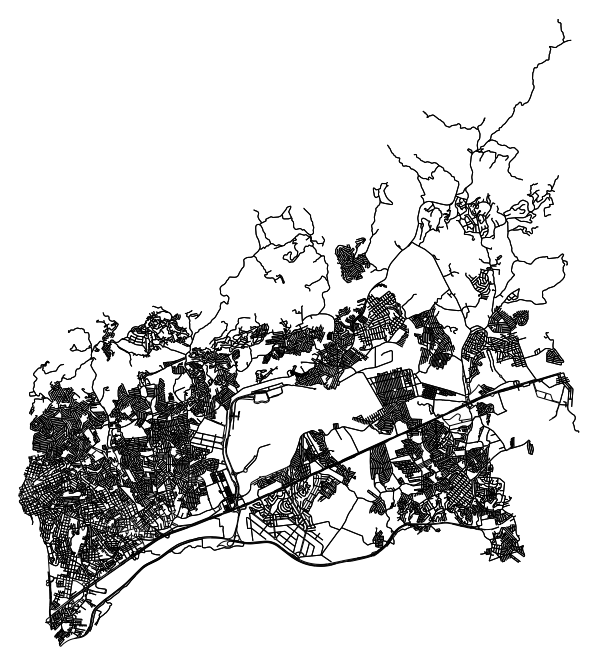

In [ ]:
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0, bgcolor= "white", edge_color="black", show = True, fig_height = 12)

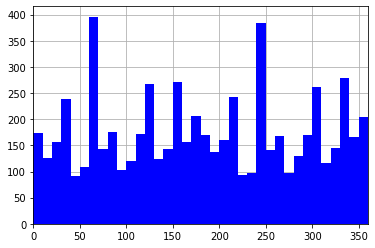

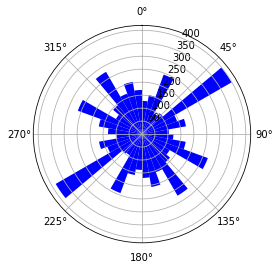

In [ ]:
cumbica_test = ox.add_edge_bearings(cumbica_test)
# calculate edge bearings and visualize their frequency
bearings = []
for u, v, k, dt in cumbica_test.edges(keys=True, data=True):
    try: 
        bearings.append((dt['bearing']))
    except:
        continue
#bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
#bearings = [[data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)]]
bearings = pd.Series(bearings)
ax = bearings.hist(bins=36, zorder=2, alpha=1, color="blue", )
xlim = ax.set_xlim(0, 360)
#ax.set_title('Cumbica street network edge bearings')
plt.show()
# polar plot
print()

n = 36
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0, color="blue")
#ax.set_yticklabels([100, 300, 500])
#ax.set_title('Cumbica street network edge bearings - polar plot', y=1.1)
plt.show()

In [ ]:
G_cumbica = ox.add_edge_bearings(G)

In [ ]:
# calculate edge bearings and visualize their frequency
bearings = []
for u, v, k, dt in G.edges(keys=True, data=True):
    try: 
        bearings.append((dt['bearing']))
    except:
        continue
#bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
#bearings = [[data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)]]

In [ ]:
bearings = pd.Series(bearings)

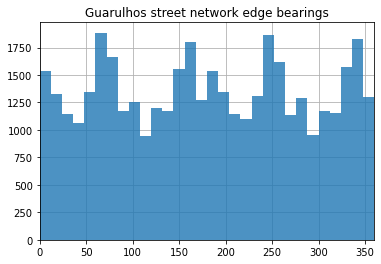

In [ ]:
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Guarulhos street network edge bearings')
plt.show()

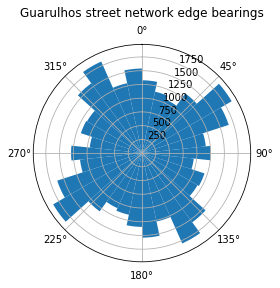

In [ ]:
# polar plot

n = 36
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Guarulhos street network edge bearings', y=1.1)
plt.show()

### Orientation problem - Cumbica

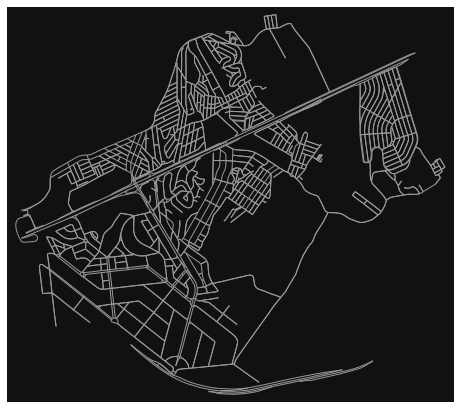

In [ ]:
# First, look at a non-grid street network
G_cumbica = ox.graph_from_place('Cumbica, Guarulhos, São Paulo, Brasil', network_type='drive')
fig, ax = ox.plot_graph(ox.project_graph(G), node_size=0)

In [ ]:
G_cumbica = ox.add_edge_bearings(G_cumbica)

In [ ]:
# calculate edge bearings and visualize their frequency
bearings = []
for u, v, k, dt in G_cumbica.edges(keys=True, data=True):
    try: 
        bearings.append((dt['bearing']))
    except:
        continue
#bearings = pd.Series([data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)])
#bearings = [[data['bearing'] for u, v, k, data in G.edges(keys=True, data=True)]]

In [ ]:
bearings = pd.Series(bearings)

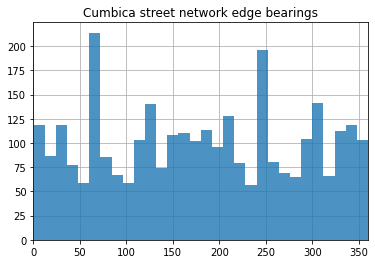

In [ ]:
ax = bearings.hist(bins=30, zorder=2, alpha=0.8)
xlim = ax.set_xlim(0, 360)
ax.set_title('Cumbica street network edge bearings')
plt.show()

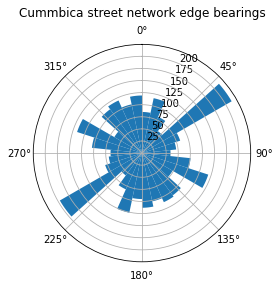

In [ ]:
# polar plot

n = 30
count, division = np.histogram(bearings, bins=[ang*360/n for ang in range(0,n+1)])
division = division[0:-1]
width =  2 * np.pi/n
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction('clockwise')
bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0)
ax.set_title('Cumbica street network edge bearings', y=1.1)
plt.show()

In [ ]:
#convert nodes information to a data frame
df_nodes = ox.graph_to_gdfs(G, edges=False)
df_nodes

In [ ]:
#convert edges information to a data frame
df_edges = ox.graph_to_gdfs(G, nodes=False)
df_edges

# Exporting the jupyter notebook

In [ ]:
! jupyter nbconvert OSM_Ambev.ipynb --to html --output OSM_Ambev.html

[NbConvertApp] Converting notebook OSM_Ambev.ipynb to html
[NbConvertApp] Writing 1509655 bytes to output.html


# TO-DOs


- Precisamos filtrar os nossos FCs...
- Além disso preciso tirar parâmetros quantitativos do nosso street network por zoneamento
- Explorar o tutorial: https://geoffboeing.com/tag/tutorial/
- Puxar hierarquia de dados: Coletora, primária, etc.
- Analisar cores dos telhados?
- km de via / km²
- Estudar hear maps
- Testar parâmetros com malhas pequenas
- Classificação de PDVs por volume de entregas.
- Sugestão da Julia: Calcular FC por mapa e não por trecho
- Importante: Documentação do que não deu certo. (evitar retrabalho)
  - Latex: https://www.overleaf.com/project/6272fb8ad5fed736a6991f70
- Next steps - 5/maio
 - Separar em categorias de PDVs
 - Caracterizar melhor as regiões de acordo com o Boeing
 - Unir PDVs, FC, Repasse e Malha

### Comentários

- Clustering uses DBSCAN to agregate different points, might be nice to better study Retailers segmentation!
- Good candidates and to-do reading list:
 - https://geoffboeing.com/2018/01/urban-street-network-centrality/
 - https://geoffboeing.com/2017/03/urban-form-figure-ground/
 - https://geoffboeing.com/2017/01/square-mile-street-network-visualization/
 - https://geoffboeing.com/2020/06/whats-new-with-osmnx/
 - https://geoffboeing.com/2021/03/worldwide-street-network-models-indicators/
 - https://dataverse.harvard.edu/dataverse/global-urban-street-networks

- Examples: https://github.com/gboeing/osmnx-examples
 - https://github.com/gboeing/osmnx-examples/blob/main/notebooks/06-stats-indicators-centrality.ipynb
 - https://github.com/gboeing/osmnx-examples/blob/main/notebooks/07-plot-graph-over-shape.ipynb
 - https://github.com/gboeing/osmnx-examples/blob/main/notebooks/15-advanced-plotting.ipynb
 - https://github.com/gboeing/osmnx-examples/blob/main/notebooks/17-street-network-orientations.ipynb
 - https://github.com/gboeing/osmnx-examples/blob/v0.11/notebooks/09-example-figure-ground.ipynb


 - Good function candidates:
  - osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)
 - 

https://towardsdatascience.com/how-to-split-shapefiles-e8a8ac494189

# Testing Geopandas

In [ ]:
# load shapefile
edges_gdf = gpd.read_file('./data/graph_shapefile/edges.shp')
edges_gdf

In [ ]:
# load shapefile
nodes_gdf = gpd.read_file('./data/graph_shapefile/nodes.shp')
nodes_gdf

In [ ]:
teste = gpd.read_file('data/shapeBairros/municipios_2010/municipios_2010.shp')
teste

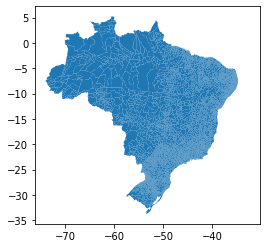

In [ ]:
teste.plot()

In [ ]:
saopaulo = teste[teste['uf'] == 'SP']
saopaulo

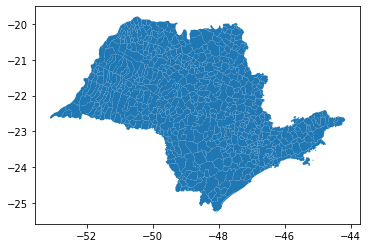

In [ ]:
saopaulo.plot()

In [ ]:
guarulhos = saopaulo[saopaulo['nome'] == "Guarulhos"]
guarulhos

id       nome  uf populacao       pib estado_id codigo_ibg  \
5464  4995  Guarulhos  SP   1221979  37139404        26    3518800   

                                               geometry  
5464  POLYGON ((-46.36213 -23.27928, -46.35605 -23.2...

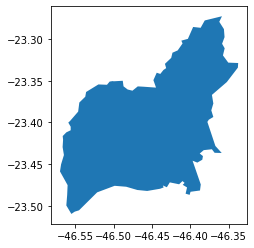

In [ ]:
guarulhos.plot()

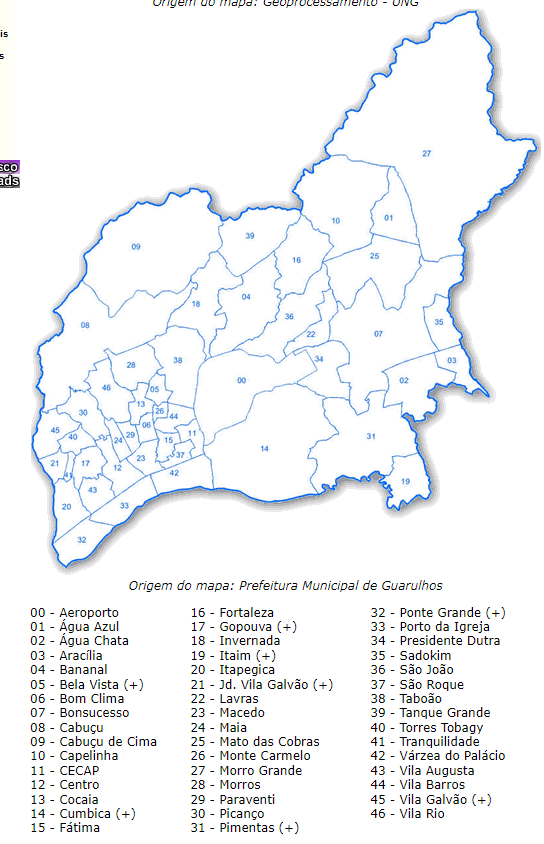

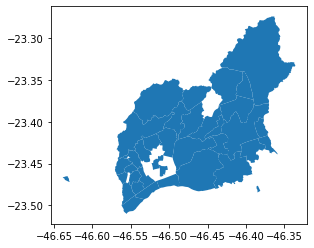

In [ ]:
GRU.plot()

In [ ]:
GRU = gpd.read_file('./data/shapeBairros/guarulhos_bairros/Suburbs_OSM-polygon.shp')

In [ ]:
GRU

Name descriptio  \
0                                      Cabuço de Cima       None   
1                                              Cabuçu       None   
2                                     Mato das Cobras       None   
3                                        Morro Grande       None   
4                                             Sadokim       None   
5                                          Bonsucesso       None   
6                             Jardim Presidente Dutra       None   
7                                           Bom Clima       None   
8                                              Lavras       None   
9                                              Taboão       None   
10  Aeroporto Internacional Governador André Franc...       None   
11                                          Água Azul       None   
12                                           Aracília       None   
13                                         Água Chata       None   
14                                          Capelinha       None   
15                                            Cumbica       None   
16                                           Pimentas       None   
17                                             Centro       None   
18                                             Fátima       None   
19                                            Gopoúva       None   
20                                 Jardim Vila Galvão       None   
21                                          Itapegica       None   
22                                      Monte Carmelo       None   
23                                             Morros       None   
24                                       Ponte Grande       None   
25                                    Porto da Igreja       None   
26                                            Picanço       None   
27                                      Torres Tibagy       None   
28                                       Vila Augusta       None   
29                                        Vila Galvão       None   
30                                           Vila Rio       None   
31                                  Várzea do Palácio       None   
32                                            Bananal       None   
33                                           Ivernada       None   
34                                           São João       None   
35                                      Tanque Grande       None   
36                                      Jardim Romano       None   
37                                    Parque Mandaqui       None   

                 _id admin_leve        boundary   place      type  \
0   relation/2531936         10  administrative  suburb  boundary   
1   relation/2531937         10  administrative  suburb  boundary   
2   relation/2541643         10  administrative  suburb  boundary   
3   relation/2541644         10  administrative  suburb  boundary   
4   relation/2541645         10  administrative  suburb  boundary   
5   relation/2541646         10  administrative  suburb  boundary   
6   relation/2541647         10  administrative  suburb  boundary   
7   relation/2548913         10  administrative  suburb  boundary   
8   relation/2541648         10  administrative  suburb  boundary   
9   relation/2548920         10  administrative  suburb  boundary   
10  relation/2542857         10  administrative  suburb  boundary   
11  relation/2542863         10  administrative  suburb  boundary   
12  relation/2542858         10  administrative  suburb  boundary   
13  relation/2542864         10  administrative  suburb  boundary   
14  relation/2542859         10  administrative  suburb  boundary   
15  relation/2542860         10  administrative  suburb  boundary   
16  relation/2542862         10  administrative  suburb  boundary   
17  relation/2548915         10  administrative  suburb  boundary   
18  relation/2548917         10  administrative  suburb  boundary   
19  relation/254

In [ ]:
coords= (( -46.4693370, -23.481058), #Cumbica
( -46.4706314, -23.480555),
( -46.4715880, -23.480095),
( -46.4729463, -23.4793081),
( -46.4731330, -23.4792),
( -46.4747920, -23.478359),
( -46.4756850, -23.478058),
( -46.4769550, -23.477861),
( -46.4781490, -23.477758),
( -46.4794010, -23.477564),
( -46.4807280, -23.477312),
( -46.4812976, -23.4772014),
( -46.4823300, -23.477001),
( -46.4837570, -23.476973),
( -46.4849700, -23.47707),
( -46.4858670, -23.4770803),
( -46.4867715, -23.4772799),
( -46.4879037, -23.4775724),
( -46.4874825, -23.4764598),
( -46.4872933, -23.475391),
( -46.4872684, -23.4736105),
( -46.4870870, -23.473064),
( -46.4870640, -23.472626),
( -46.4873240, -23.470854),
( -46.4873470, -23.470247),
( -46.4874080, -23.469929),
( -46.4874800, -23.469643),
( -46.4874840, -23.46929),
( -46.4876020, -23.468796),
( -46.4877170, -23.468164),
( -46.4878350, -23.467905),
( -46.4878310, -23.467611),
( -46.4877550, -23.46731),
( -46.4877510, -23.466854),
( -46.4877660, -23.466549),
( -46.4878500, -23.466217),
( -46.4878770, -23.465731),
( -46.4878500, -23.465298),
( -46.4878742, -23.465072),
( -46.4879421, -23.464904),
( -46.4882240, -23.464594),
( -46.4884260, -23.464371),
( -46.4886050, -23.464239),
( -46.4888570, -23.464094),
( -46.4890140, -23.463974),
( -46.4892770, -23.463781),
( -46.4905470, -23.462929),
( -46.4908370, -23.462236),
( -46.4909480, -23.461975),
( -46.4915850, -23.460478),
( -46.4912834, -23.4582515),
( -46.4906484, -23.4582752),
( -46.4904221, -23.4582602),
( -46.4901704, -23.4582282),
( -46.4899304, -23.4581827),
( -46.4898899, -23.458171),
( -46.4896543, -23.4581028),
( -46.4895279, -23.4580636),
( -46.4894262, -23.4580321),
( -46.4893824, -23.4580175),
( -46.4891327, -23.4579346),
( -46.4890534, -23.4579082),
( -46.4886038, -23.4577589),
( -46.4882441, -23.4575974),
( -46.4880158, -23.4574773),
( -46.4877998, -23.4573289),
( -46.4875953, -23.4571737),
( -46.4869196, -23.4566194),
( -46.4864914, -23.456009),
( -46.4862725, -23.4556699),
( -46.4861885, -23.4554586),
( -46.4861603, -23.4553164),
( -46.4861521, -23.4551746),
( -46.4861572, -23.4550485),
( -46.4862072, -23.4546874),
( -46.4861908, -23.4543954),
( -46.4861503, -23.4541157),
( -46.4860640, -23.4537462),
( -46.4860005, -23.453547),
( -46.4858967, -23.4533602),
( -46.4856466, -23.4530195),
( -46.4850824, -23.4525893),
( -46.4843951, -23.4523626),
( -46.4828061, -23.4517305),
( -46.4824154, -23.451455),
( -46.482349 ,-23.451301),
( -46.4821718, -23.4512119),
( -46.4819492, -23.4511188),
( -46.4815775, -23.4510042),
( -46.4811833, -23.4510474),
( -46.4809627, -23.4509947),
( -46.4808289, -23.4509829),
( -46.4805316, -23.4509269),
( -46.4801785, -23.4508338),
( -46.4786379, -23.4501815),
( -46.4764808, -23.4494446),
( -46.4750731, -23.4489046),
( -46.4725821, -23.4479644),
( -46.4721032, -23.4477005),
( -46.4719706, -23.4475028),
( -46.4718607, -23.4473537),
( -46.4717683, -23.4472181),
( -46.4716155, -23.4470285),
( -46.4715634, -23.4469517),
( -46.4715016, -23.4468133),
( -46.4714181, -23.4461815),
( -46.4713863, -23.4460056),
( -46.4713242, -23.4458074),
( -46.4711597, -23.4454996),
( -46.4709808, -23.4451646),
( -46.4705822, -23.4444979),
( -46.4699536, -23.4434172),
( -46.4696193, -23.4427392),
( -46.4694569, -23.4423784),
( -46.4683862, -23.4395495),
( -46.4681676, -23.4388106),
( -46.4680217, -23.4383372),
( -46.4678565, -23.4379385),
( -46.4677123, -23.4376514),
( -46.4674307, -23.4372822),
( -46.467125 ,-23.4369868),
( -46.4666981, -23.4367218),
( -46.4663625, -23.4365006),
( -46.4629311, -23.4352622),
( -46.462607 ,-23.435149),
( -46.4623057, -23.4350437),
( -46.4611871, -23.4352401),
( -46.4604956, -23.4353488),
( -46.4598724, -23.4353566),
( -46.459032 ,-23.4351678),
( -46.4585645, -23.4344117),
( -46.4582937, -23.4338817),
( -46.4579226, -23.4336622),
( -46.457689 ,-23.4336103),
( -46.4574247, -23.433577),
( -46.4571799, -23.4335382),
( -46.4570682, -23.4334966),
( -46.4569909, -23.4333922),
( -46.4569174, -23.43334),
( -46.4568546, -23.4333222),
( -46.4567237, -23.4333121),
( -46.456609 ,-23.4333217),
( -46.4563768, -23.4333631),
( -46.4559529, -23.4333592),
( -46.455073 ,-23.4332831),
( -46.4544711, -23.4332388),
( -46.4542034, -23.4332025),
( -46.4536578, -23.4330226),
( -46.4535169, -23.4329392),
( -46.4534934, -23.4327859),
( -46.4534857, -23.4326909),
( -46.4534105, -23.4326452),
( -46.4532495, -23.4326507),
( -46.4527586, -23.4326165),
( -46.4523549, -23.4325822),
( -46.4515811, -23.4324347),
( -46.4513304, -23.432458),
( -46.4502298, -23.4327299),
( -46.4491027, -23.4322465),
( -46.4489509, -23.4321708),
( -46.4488446, -23.4321075),
( -46.4453317, -23.4335173),
( -46.4450245, -23.4337406),
( -46.4445908, -23.4338369),
( -46.4439751, -23.4337406),
( -46.4435578, -23.4336316),
( -46.441734 ,-23.435053),
( -46.43922  ,-23.436192),
( -46.438992 ,-23.436962),
( -46.437443 ,-23.437361),
( -46.4369122, -23.4374978),
( -46.436333 ,-23.437647),
( -46.436192 ,-23.4376779),
( -46.435375 ,-23.437857),
( -46.435126 ,-23.4379247),
( -46.4346282, -23.4380602),
( -46.4342944, -23.4388087),
( -46.4356931, -23.4393692),
( -46.435837 ,-23.439447),
( -46.435875 ,-23.439579),
( -46.435925 ,-23.439699),
( -46.435925 ,-23.439837),
( -46.4357052, -23.4413139),
( -46.4358657, -23.441909),
( -46.4355265, -23.4426283),
( -46.4354462, -23.4428489),
( -46.435371 ,-23.44311),
( -46.4351974, -23.4435293),
( -46.4351217, -23.4439553),
( -46.4351072, -23.4440532),
( -46.4351334, -23.4441568),
( -46.4354526, -23.4449294),
( -46.4354646, -23.4450247),
( -46.4354455, -23.445146),
( -46.4352861, -23.4455973),
( -46.4352261, -23.4457863),
( -46.4351676, -23.4460143),
( -46.4347672, -23.4467526),
( -46.434639 ,-23.446918),
( -46.434425 ,-23.447031),
( -46.4342168, -23.4471414),
( -46.4340853, -23.4472386),
( -46.4340412, -23.4473384),
( -46.4339099, -23.4475044),
( -46.4337299, -23.447756),
( -46.4334368, -23.4482968),
( -46.4333355, -23.4484001),
( -46.4331516, -23.4486525),
( -46.432983 ,-23.448792),
( -46.432816 ,-23.448961),
( -46.432785 ,-23.449074),
( -46.432781 ,-23.449259),
( -46.432732 ,-23.449413),
( -46.432568 ,-23.44964),
( -46.432194 ,-23.450026),
( -46.43214  ,-23.450069),
( -46.431854 ,-23.45026),
( -46.431496 ,-23.450459),
( -46.431171 ,-23.450632),
( -46.430962 ,-23.450802),
( -46.430805 ,-23.450897),
( -46.430534 ,-23.451122),
( -46.430271 ,-23.451218),
( -46.430225 ,-23.451263),
( -46.430214 ,-23.451578),
( -46.430138 ,-23.451954),
( -46.429913 ,-23.452219),
( -46.429134 ,-23.452936),
( -46.428963 ,-23.453152),
( -46.428905 ,-23.453255),
( -46.428642 ,-23.453714),
( -46.428627 ,-23.453787),
( -46.428635 ,-23.453878),
( -46.428711 ,-23.454166),
( -46.4287815, -23.4543064),
( -46.4287999, -23.4543747),
( -46.4295134, -23.4541436),
( -46.4302297, -23.4542527),
( -46.4309771, -23.4544838),
( -46.4312659, -23.4546838),
( -46.4320869, -23.4555629),
( -46.433632, -23.456392),
( -46.43409 ,-23.456635),
( -46.434303, -23.456709),
( -46.434444, -23.456743),
( -46.434589, -23.456766),
( -46.434734, -23.456776),
( -46.434971, -23.456766),
( -46.435204, -23.456758),
( -46.435421, -23.456747),
( -46.435638, -23.456745),
( -46.435867, -23.456755),
( -46.436096, -23.456781),
( -46.4364115, -23.4568356),
( -46.436638, -23.456873),
( -46.436932, -23.456913),
( -46.437199, -23.456945),
( -46.437527, -23.456993),
( -46.437981, -23.457066),
( -46.438145, -23.457104),
( -46.438248, -23.457134),
( -46.438343, -23.457178),
( -46.438465, -23.457243),
( -46.438728, -23.457401),
( -46.438786, -23.457434),
( -46.438828, -23.457479),
( -46.438858, -23.457533),
( -46.438904, -23.457722),
( -46.438965, -23.457899),
( -46.439049, -23.458111),
( -46.439117, -23.458261),
( -46.439224, -23.458443),
( -46.439346, -23.458624),
( -46.439533, -23.458874),
( -46.439629, -23.458982),
( -46.439781, -23.459156),
( -46.439869, -23.459232),
( -46.439957, -23.459311),
( -46.440022, -23.459356),
( -46.44014 ,-23.459457),
( -46.440418, -23.459661),
( -46.440769, -23.459904),
( -46.440849, -23.459955),
( -46.440933, -23.459999),
( -46.441017, -23.46003),
( -46.441196, -23.460083),
( -46.4421305, -23.4603418),
( -46.4415542, -23.4612396),
( -46.4415392, -23.4612715),
( -46.4415482, -23.4613181),
( -46.4415612, -23.46134),
( -46.441643 ,-23.461376),
( -46.441708 ,-23.461407),
( -46.441761, -23.461433),
( -46.441807, -23.46147),
( -46.441841, -23.461517),
( -46.44241 ,-23.462412),
( -46.442657, -23.462809),
( -46.442677, -23.462866),
( -46.442696, -23.462923),
( -46.442722, -23.463076),
( -46.442745, -23.463215),
( -46.442978, -23.464367),
( -46.442966, -23.464424),
( -46.442951, -23.464457),
( -46.442924, -23.464481),
( -46.44289 ,-23.464495),
( -46.442795 ,-23.464521),
( -46.442455 ,-23.464563),
( -46.442059 ,-23.464504),
( -46.441349 ,-23.46451),
( -46.440586 ,-23.464439),
( -46.4401535, -23.4645026),
( -46.4397151, -23.4648358),
( -46.439541 , -23.464867),
( -46.439342 , -23.464895),
( -46.439289 , -23.464947),
( -46.439205 , -23.465132),
( -46.439064 , -23.465132),
( -46.438923 , -23.465395),
( -46.438927 , -23.465656),
( -46.438931 , -23.465891),
( -46.439018 , -23.466072),
( -46.438961 , -23.466204),
( -46.438934 , -23.46636),
( -46.438992 , -23.466438),
( -46.438995 , -23.466673),
( -46.438999 , -23.466934),
( -46.438942 , -23.467039),
( -46.438828 , -23.467014),
( -46.438629 , -23.467094),
( -46.438576 , -23.467253),
( -46.43858  ,-23.467436),
( -46.438694 , -23.46759),
( -46.438843 , -23.467829),
( -46.438896 , -23.468344),
( -46.439026 , -23.468422),
( -46.439129 , -23.468786),
( -46.439075 , -23.46892),
( -46.439137 , -23.469034),
( -46.439079 ,-23.469116),
( -46.439034 ,-23.469122),
( -46.439087 ,-23.469301),
( -46.439205 ,-23.469351),
( -46.439335 ,-23.469313),
( -46.439491 ,-23.469395),
( -46.439636 ,-23.46965),
( -46.4396881, -23.4700341),
( -46.4397187, -23.4703939),
( -46.439926 ,-23.470638),
( -46.440327 ,-23.470917),
( -46.440563 ,-23.471323),
( -46.441013 ,-23.471792),
( -46.4416133, -23.4724407),
( -46.441857 ,-23.4727671),
( -46.4419828, -23.4731058),
( -46.4420799, -23.4735804),
( -46.441929 ,-23.47426),
( -46.4417213, -23.4746792),
( -46.4410563, -23.4747556),
( -46.4408751, -23.4763903),
( -46.438034, -23.479948),
( -46.438579, -23.4800037),
( -46.43898 ,-23.48004),
( -46.439274 ,-23.48008),
( -46.439579 ,-23.480099),
( -46.4397444, -23.4800736),
( -46.4400144, -23.4799906),
( -46.440202 ,-23.479824),
( -46.4402512, -23.479585),
( -46.4405501, -23.4792775),
( -46.4409424, -23.479209),
( -46.4412902, -23.4792739),
( -46.4422502, -23.4795132),
( -46.44325, -23.479803),
( -46.4443283, -23.4801664),
( -46.4457400, -23.480606),
( -46.446625 ,-23.480844),
( -46.447445 ,-23.480927),
( -46.448383 ,-23.481112),
( -46.449287 ,-23.481333),
( -46.450054 ,-23.481554),
( -46.451759 ,-23.481873),
( -46.453312 ,-23.482122),
( -46.454575 ,-23.482374),
( -46.455879 ,-23.482557),
( -46.4567168, -23.4827043),
( -46.4572808, -23.48275),
( -46.457701 ,-23.482646),
( -46.458191 ,-23.482483),
( -46.458748 ,-23.482582),
( -46.459267 ,-23.482754),
( -46.459656 ,-23.482887),
( -46.460754 ,-23.482946),
( -46.4613876, -23.4830653),
( -46.4638991, -23.4827333),
( -46.465412, -23.482285),
( -46.467007, -23.481859),
( -46.46838 ,-23.481453),
( -46.469337, -23.481058))

In [ ]:
#coords = ((-46.507723, -23.4401735), (-46.508675, -23.429399), (-46.493225, -23.409929), ( -46.507723, -23.4401735))
polygon = Polygon(coords)

In [ ]:
cumbica_test = ox.graph_from_polygon(polygon)

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed 

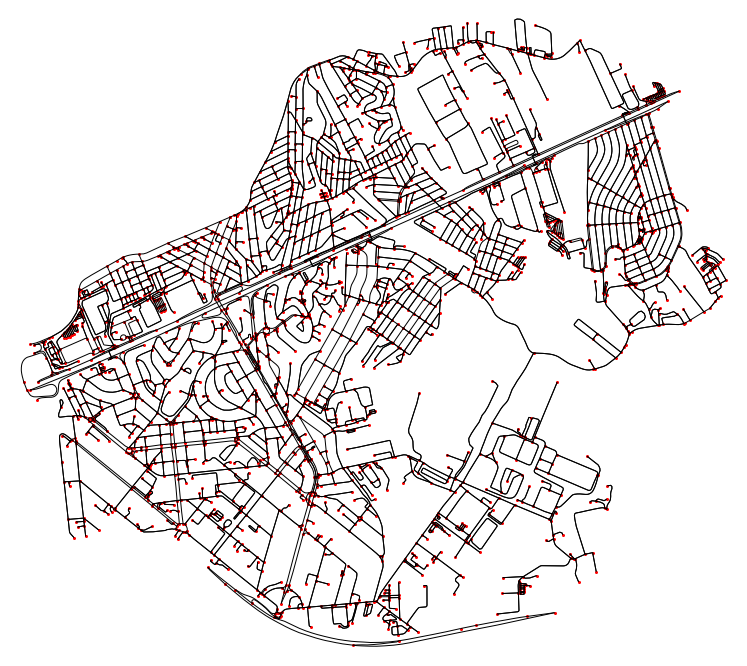

(<Figure size 1058.38x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf87f34d50>)

In [ ]:
ox.plot_graph(cumbica_test, 
              fig_height=12,
              bgcolor='white', 
              node_color='red', 
              node_size=4, 
              node_alpha=None, 
              node_edgecolor='red', 
              node_zorder=1, 
              edge_color='black', 
              edge_linewidth=1, 
              edge_alpha=None, 
              show=True, 
              close=False, 
              save=False, 
              dpi=600, 
              bbox=None)

In [ ]:
ox.basic_stats(G_test)

# Consolidate comparison of different neighborhoods

In [ ]:
# hood_boundaries = gpd.read_file('data/shapeBairros/Zoneamento_Guarulhos/Zoneamento_Guarulhos.shp')
# hood_boundaries

In [4]:
hood_boundaries = gpd.read_file('./data/shapeBairros/guarulhos_bairros/Suburbs_OSM-polygon.shp')
hood_boundaries

Name descriptio  \
0                                      Cabuço de Cima       None   
1                                              Cabuçu       None   
2                                     Mato das Cobras       None   
3                                        Morro Grande       None   
4                                             Sadokim       None   
5                                          Bonsucesso       None   
6                             Jardim Presidente Dutra       None   
7                                           Bom Clima       None   
8                                              Lavras       None   
9                                              Taboão       None   
10  Aeroporto Internacional Governador André Franc...       None   
11                                          Água Azul       None   
12                                           Aracília       None   
13                                         Água Chata       None   
14                                          Capelinha       None   
15                                            Cumbica       None   
16                                           Pimentas       None   
17                                             Centro       None   
18                                             Fátima       None   
19                                            Gopoúva       None   
20                                 Jardim Vila Galvão       None   
21                                          Itapegica       None   
22                                      Monte Carmelo       None   
23                                             Morros       None   
24                                       Ponte Grande       None   
25                                    Porto da Igreja       None   
26                                            Picanço       None   
27                                      Torres Tibagy       None   
28                                       Vila Augusta       None   
29                                        Vila Galvão       None   
30                                           Vila Rio       None   
31                                  Várzea do Palácio       None   
32                                            Bananal       None   
33                                           Ivernada       None   
34                                           São João       None   
35                                      Tanque Grande       None   
36                                      Jardim Romano       None   
37                                    Parque Mandaqui       None   

                 _id admin_leve        boundary   place      type  \
0   relation/2531936         10  administrative  suburb  boundary   
1   relation/2531937         10  administrative  suburb  boundary   
2   relation/2541643         10  administrative  suburb  boundary   
3   relation/2541644         10  administrative  suburb  boundary   
4   relation/2541645         10  administrative  suburb  boundary   
5   relation/2541646         10  administrative  suburb  boundary   
6   relation/2541647         10  administrative  suburb  boundary   
7   relation/2548913         10  administrative  suburb  boundary   
8   relation/2541648         10  administrative  suburb  boundary   
9   relation/2548920         10  administrative  suburb  boundary   
10  relation/2542857         10  administrative  suburb  boundary   
11  relation/2542863         10  administrative  suburb  boundary   
12  relation/2542858         10  administrative  suburb  boundary   
13  relation/2542864         10  administrative  suburb  boundary   
14  relation/2542859         10  administrative  suburb  boundary   
15  relation/2542860         10  administrative  suburb  boundary   
16  relation/2542862         10  administrative  suburb  boundary   
17  relation/2548915         10  administrative  suburb  boundary   
18  relation/2548917         10  administrative  suburb  boundary   
19  relation/254

In [6]:
bd_hood_dict = hood_boundaries.set_index('Name')['geometry'].to_dict()
bd_hood_dict

{'Aeroporto Internacional Governador André Franco Montoro': <shapely.geometry.polygon.Polygon at 0x7fc7468356d0>,
 'Aracília': <shapely.geometry.polygon.Polygon at 0x7fc722d741d0>,
 'Bananal': <shapely.geometry.polygon.Polygon at 0x7fc722d53550>,
 'Bom Clima': <shapely.geometry.polygon.Polygon at 0x7fc740b44410>,
 'Bonsucesso': <shapely.geometry.polygon.Polygon at 0x7fc7466f2e10>,
 'Cabuço de Cima': <shapely.geometry.polygon.Polygon at 0x7fc722de8050>,
 'Cabuçu': <shapely.geometry.polygon.Polygon at 0x7fc722ded190>,
 'Capelinha': <shapely.geometry.polygon.Polygon at 0x7fc722d99c90>,
 'Centro': <shapely.geometry.polygon.Polygon at 0x7fc722daea50>,
 'Cumbica': <shapely.geometry.polygon.Polygon at 0x7fc722d99850>,
 'Fátima': <shapely.geometry.polygon.Polygon at 0x7fc722daef10>,
 'Gopoúva': <shapely.geometry.polygon.Polygon at 0x7fc722daeed0>,
 'Itapegica': <shapely.geometry.polygon.Polygon at 0x7fc722d45e10>,
 'Ivernada': <shapely.geometry.polygon.Polygon at 0x7fc722d53a10>,
 'Jardim Pres

In [7]:
container = {}
for i, j in enumerate(bd_hood_dict.keys()):
    # i= counter
    # j = key
    try:
        container[j] = ox.add_edge_bearings(
            ox.graph_from_polygon(polygon = bd_hood_dict[j],                                       
                                  network_type='all_private',
                                  simplify=False,
                                  retain_all=False,
                                  truncate_by_edge=False,
                                  name='unnamed',
                                  timeout=180,
                                  memory=None,
                                  max_query_area_size=50 * 1000 * 50 * 1000,
                                  clean_periphery=True,
                                  infrastructure='way["highway"]',
                                  custom_filter=None
                                  ))
        print("Já concluímos ", i, " conversões de ", len(bd_hood_dict.keys()), " disponíveis.")
    except KeyError:
        # "Não foi possível inicializar pelo menos 1 dos zoneamentos."
        pass

container

/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  0  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  1  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  2  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs


Já concluímos  3  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/p

Já concluímos  4  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  5  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  6  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  7  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  8  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  9  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  10  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  11  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  12  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  13  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  14  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  15  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  16  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  17  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  18  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  19  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  20  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  21  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  22  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  23  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  24  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  25  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  26  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  27  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  28  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  29  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  30  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  31  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  32  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  33  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


Já concluímos  34  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/p

Já concluímos  35  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/projection.py:72: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  gdf.crs = crs
/usr/local/lib/python3.7/dist-packages/osmnx/core.py:341: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:


Já concluímos  36  conversões de  38  disponíveis.
Já concluímos  37  conversões de  38  disponíveis.


/usr/local/lib/python3.7/dist-packages/osmnx/core.py:661: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


{'Aeroporto Internacional Governador André Franco Montoro': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc721932890>,
 'Aracília': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc7209dc790>,
 'Bananal': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc718309f50>,
 'Bom Clima': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc72108a0d0>,
 'Bonsucesso': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc71f337650>,
 'Cabuço de Cima': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc72282b210>,
 'Cabuçu': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc720a5e810>,
 'Capelinha': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc71e855210>,
 'Centro': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc721762f50>,
 'Cumbica': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc71b78a9d0>,
 'Fátima': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc722a3d510>,
 'Gopoúva': <networkx.classes.multidigraph.MultiDiGraph at 0x7fc71e047e50>,
 'Itapegica': <networkx.clas

In [8]:
# Evaluate bearing at each and convert to a dataframe 
bearings_dict = {}
for i,j in enumerate(container.keys()):
    # calculate edge bearings and visualize their frequency
    bearings = []
    for u, v, k, dt in container[j].edges(keys=True, data=True):
        try: 
            bearings.append((dt['bearing']))
        except:
            continue
    bearings_dict[j] = pd.Series(bearings)

In [9]:
bearings_dict.keys()

dict_keys(['Cabuço de Cima', 'Cabuçu', 'Mato das Cobras', 'Morro Grande', 'Sadokim', 'Bonsucesso', 'Jardim Presidente Dutra', 'Bom Clima', 'Lavras', 'Taboão', 'Aeroporto Internacional Governador André Franco Montoro', 'Água Azul', 'Aracília', 'Água Chata', 'Capelinha', 'Cumbica', 'Pimentas', 'Centro', 'Fátima', 'Gopoúva', 'Jardim Vila Galvão', 'Itapegica', 'Monte Carmelo', 'Morros', 'Ponte Grande', 'Porto da Igreja', 'Picanço', 'Torres Tibagy', 'Vila Augusta', 'Vila Galvão', 'Vila Rio', 'Várzea do Palácio', 'Bananal', 'Ivernada', 'São João', 'Tanque Grande', 'Jardim Romano', 'Parque Mandaqui'])

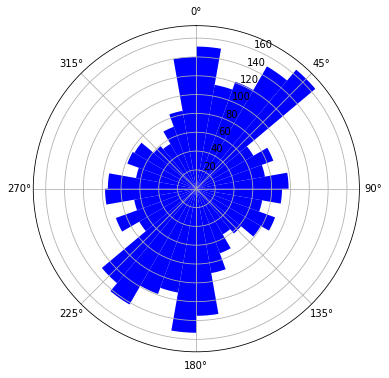

In [14]:
diretorio =['Ponte Grande']
fig = plt.figure(figsize=(6, 6))
# plt.suptitle("Average streets orientation by neighborhood - Guarulhos SP",
#              fontsize=20, verticalalignment='top')
for i, j in enumerate(diretorio):
    n = 36
    count, division = np.histogram(bearings_dict[j], bins=[ang*360/n for ang in range(0,n+1)])
    division = division[0:-1]
    width =  2 * np.pi/n
    # 1 rows and 1 columns
    ax = plt.subplot(1, 1, i+1, projection='polar', label=str(j)) 
    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')
    bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0, color='b')
    # ax.set_title(j[0:15], y=1.1)
#plt.tight_layout()
plt.show()


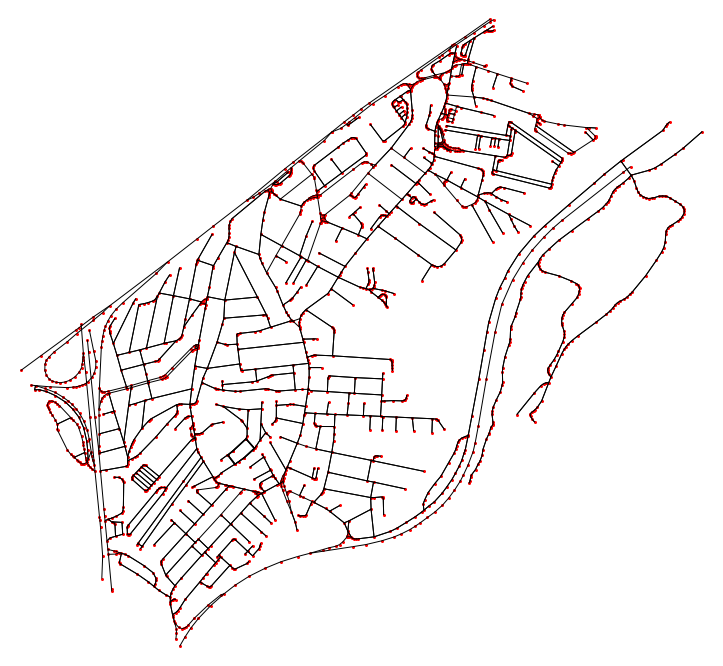

(<Figure size 1023.58x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc7111f6790>)

In [18]:
ox.plot_graph(container['Ponte Grande'], 
              fig_height=12,
              bgcolor='white', 
              node_color='red', 
              node_size=4, 
              node_alpha=None, 
              node_edgecolor='red', 
              node_zorder=1, 
              edge_color='black', 
              edge_linewidth=1, 
              edge_alpha=None, 
              show=True, 
              close=False, 
              save=False, 
              dpi=600, 
              bbox=None)

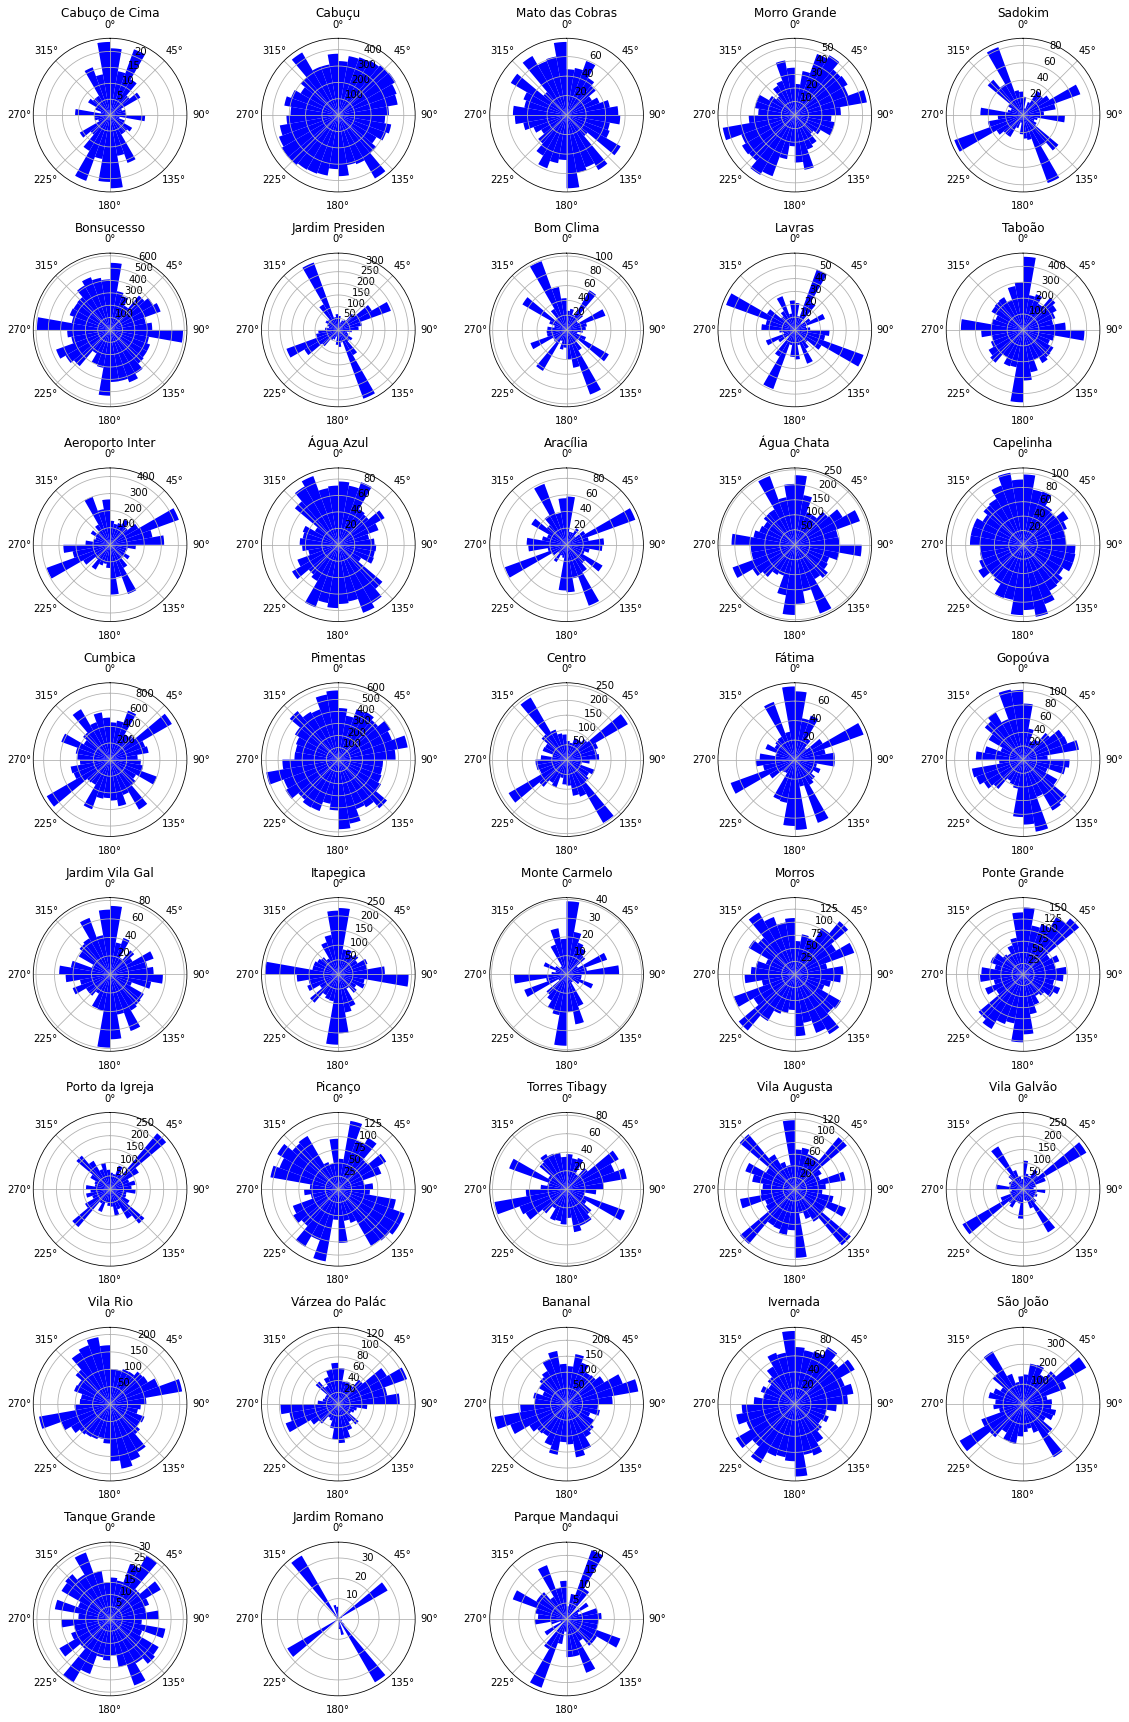

In [ ]:
# polar plot of all zones
fig = plt.figure(figsize=(16, 24))
# plt.suptitle("Average streets orientation by neighborhood - Guarulhos SP",
#              fontsize=20, verticalalignment='top')
for i, j in enumerate(bearings_dict.keys()):
    n = 36
    count, division = np.histogram(bearings_dict[j], bins=[ang*360/n for ang in range(0,n+1)])
    division = division[0:-1]
    width =  2 * np.pi/n
    # 5 rows and 8 columns
    ax = plt.subplot(8, 5, i+1, projection='polar', label=str(j)) 
    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')
    bars = ax.bar(division * np.pi/180 - width * 0.5 , count, width=width, bottom=0.0, color='b')
    ax.set_title(j[0:15], y=1.1)
plt.tight_layout()
plt.show()


### Export basic stats from our network

In [ ]:
for i in list(ox.basic_stats(container['Jardim Presidente Dutra']).keys()):
    print(i)

n
m
k_avg
intersection_count
streets_per_node_avg
streets_per_node_counts
streets_per_node_proportion
edge_length_total
edge_length_avg
street_length_total
street_length_avg
street_segments_count
node_density_km
intersection_density_km
edge_density_km
street_density_km
circuity_avg
self_loop_proportion
clean_intersection_count
clean_intersection_density_km


In [ ]:
# Save basic stats into a list of lists
matrix =[]
for i,j in enumerate(container.keys()):
    c1 = ox.basic_stats(container[j])
    if i==0:
        a = ["Name"]
        for t in list(c1.keys()):
            a.append('circuity_avg')
            a.append('clean_intersection_count')
            a.append('clean_intersection_density_km')
            a.append('edge_density_km')
            a.append('edge_length_avg')
            a.append('edge_length_total')
            a.append('intersection_count')
            a.append('intersection_density_km')
            a.append('k_avg')
            a.append('m')
            a.append('n')
            a.append('node_density_km')
            a.append('self_loop_proportion')
            a.append('street_density_km')
            a.append('street_length_avg')
            a.append('street_length_total')
            a.append('street_segments_count')
            a.append('streets_per_node_avg')
        matrix.append(a)
    row = []
    row.append(j)
    for k, l in enumerate(c1.keys()):
        #row.append(c1[k]) 
        row.append(c1['circuity_avg'])
        row.append(c1['clean_intersection_count'])
        row.append(c1['clean_intersection_density_km'])
        row.append(c1['edge_density_km'])
        row.append(c1['edge_length_avg'])
        row.append(c1['edge_length_total'])
        row.append(c1['intersection_count'])
        row.append(c1['intersection_density_km'])
        row.append(c1['k_avg'])
        row.append(c1['m'])
        row.append(c1['n'])
        row.append(c1['node_density_km'])
        row.append(c1['self_loop_proportion'])
        row.append(c1['street_density_km'])
        row.append(c1['street_length_avg'])
        row.append(c1['street_length_total'])
        row.append(c1['street_segments_count'])
        row.append(c1['streets_per_node_avg'])
        #'streets_per_node_counts': {0: 0, 1: 114, 2: 768, 3: 500, 4: 130},
        #'streets_per_node_proportion'
    matrix.append(row)

matrix = np.array(matrix)
matrix

array([['Name', 'circuity_avg', 'clean_intersection_count', ...,
        'street_length_total', 'street_segments_count',
        'streets_per_node_avg'],
       ['Cabuço de Cima', 0.9999991740241644, None, ..., 4431.596, 196,
        1.9898477157360406],
       ['Cabuçu', 1.0000000435111172, None, ..., 164254.9510000003, 6614,
        2.127372145384368],
       ...,
       ['Tanque Grande', 1.0000003677868317, None, ..., 15515.371, 361,
        2.0],
       ['Jardim Romano', 1.0000009051167138, None, ..., 4516.687, 97,
        2.425],
       ['Parque Mandaqui', 0.9999999424077577, None, ...,
        4642.079999999998, 190, 2.087912087912088]], dtype=object)

In [ ]:
arquivo = open("arquivo_export.csv", "w")

for i in matrix:
    for j in i:
        arquivo.write(str(j))
        arquivo.write('; ')
    arquivo.write('\n')

arquivo.close()

In [ ]:
# !pip install openpyxl
# !pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 5.2 MB/s 


In [ ]:
# with pd.ExcelWriter('osmnx_stats_guarulhos.xlsx', engine='xlsxwriter') as writer:
#     df.to_excel(writer, sheet_name='osmnx')
#     writer.save()

/usr/local/lib/python3.7/dist-packages/xlsxwriter/workbook.py:339: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
